In [2]:
import sys
import math
import importlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tfl
#import tensorflow_datasets as tfds
import cv_image_proc

#tf.config.run_functions_eagerly(True) # this is needed for debugging!!!
#tf.data.experimental.enable_debug_mode() # eager execution of tf.data functions

#print(f"Function exec eagerly: {tf.executing_eagerly()}")
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2
2
Using ID skip: ListWrapper([1, 1]); shapes: (None, 256, 256, 32) and (None, 128, 128, 16)
Model: "actor"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                2)]                                                               
                                                                                                  
 conv2d_216 (Conv2D)            (None, 128, 128, 32  4096        ['input_45[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_130 (Batch  (None, 128, 128, 32  128        ['conv2d_216[0][0]']             


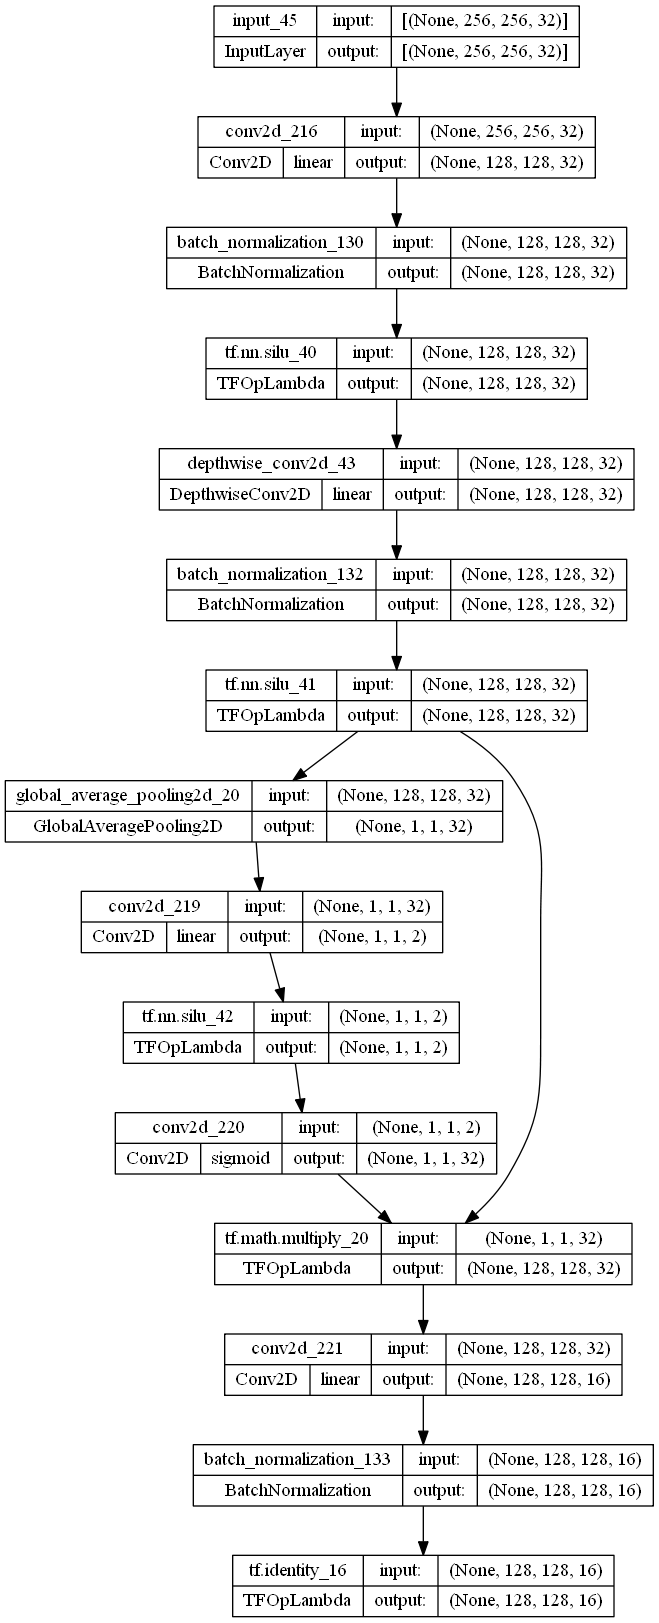

In [26]:
import EfficientNet
importlib.reload(EfficientNet)

_DEFAULT_BLOCKS_ARGS = [
    'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
    'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
    'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
    'r1_k3_s11_e6_i192_o320_se0.25',
]

global_params = EfficientNet.GlobalParams(
      blocks_args=_DEFAULT_BLOCKS_ARGS,
      batch_norm_momentum=0.99,
      batch_norm_epsilon=1e-3,
      dropout_rate=0.2,
      survival_prob=0.8,
      num_classes=1000,
      width_coefficient=None,
      depth_coefficient=None,
      depth_divisor=8,
      min_depth=None,
      relu_fn=tf.nn.swish,
      use_se=True,
      clip_projection_output=False)

dec = EfficientNet.BlockDecoder()
block_args = dec.decode(global_params.blocks_args)

m = tf.keras.Sequential([
    tfl.InputLayer(input_shape=(256,256,1)),
    EfficientNet.MBConvBlock(block_args[0], global_params)
])

MB = EfficientNet.MBConvBlock(block_args[0], global_params)
MB.summary(input_shape=(256,256,32))

#y.build(input_shape=(1,256,256,1))
#y.compile(keras.optimizers.Adam(), loss='mse')
#x = tfl.Input(shape=(256,256,1))

def cv_process_images(Test = False):
    for file in file_set:
        img, mask, qua = cv_image_proc.detect_pupil(file.numpy(), isReference=False)
        # NOTE: here we could skip some files where no pupil has been found..
        print(f"LOAD: {file} -- pupil: {qua}")
        yield tf.convert_to_tensor(img, dtype=tf.float32), tf.convert_to_tensor(mask, dtype=tf.float32)

test = False
dataset = tf.data.Dataset.from_generator(
     cv_process_images, 
     output_types = tf.float32,
     args = (test,)
     #output_signature =
      #   tf.TensorSpec(shape=(), dtype=tf.int32)
)

# 2D convolution (KxK) (chns, rows, cols) -> (filters, new_rows, new_cols)
# this uses 'filter' convolution kernels of size (K x K x chns) which slide over the spatial dimension


In [15]:
shape = (4, 14, 15, 31)
x = tf.random.normal(shape)
y1 = tfl.GlobalAveragePooling2D(keepdims=True)(x)
y2 = tf.reduce_mean(
          x, axis=[1,2], keepdims=True)

kernel_size = [1, shape[1], shape[2], 1]
y3 = tf.nn.avg_pool(x,
          ksize=kernel_size,
          strides=1,
          padding='VALID')
dif13 = y1 - y3
dif12 = y1 - y2

print(dif13)
print(dif12)


tf.Tensor(
[[[[ 5.5879354e-09 -3.7252903e-09  0.0000000e+00  2.9802322e-08
    -7.9162419e-09  2.2351742e-08  1.4901161e-08 -2.9802322e-08
     2.7939677e-09  1.4901161e-08  0.0000000e+00  7.4505806e-09
    -1.1175871e-08  1.3038516e-08  4.6566129e-09 -2.2351742e-08
     0.0000000e+00  2.9802322e-08  0.0000000e+00  1.1175871e-08
    -1.1175871e-08 -1.1175871e-08  0.0000000e+00  1.4901161e-08
     2.6077032e-08  7.4505806e-09  1.8626451e-09 -2.7008355e-08
    -5.2154064e-08 -1.4901161e-08 -2.9802322e-08]]]


 [[[ 3.7252903e-09  2.9802322e-08 -5.5879354e-09  3.7252903e-09
    -1.8626451e-09  1.4901161e-08 -5.5879354e-09  7.4505806e-09
    -2.2351742e-08  7.4505806e-08  0.0000000e+00  1.4901161e-08
    -1.1175871e-08 -6.7055225e-08  4.4703484e-08  2.2351742e-08
     7.4505806e-09  5.5879354e-09 -2.9802322e-08 -3.7252903e-09
    -1.1175871e-08  1.1175871e-08 -5.5413693e-08 -1.4901161e-08
     2.2351742e-08  3.3527613e-08 -4.8428774e-08 -1.4901161e-08
    -2.9802322e-08  7.4505806e-09 -7.45